In [ ]:
!

<a href="https://colab.research.google.com/github/arthurflor23/handwritten-text-recognition/blob/master/src/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/arthurflor23/handwritten-text-recognition/blob/master/doc/image/header.png?raw=true" />

# Handwritten Text Recognition using TensorFlow 2.0

This tutorial shows how you can use the project [Handwritten Text Recognition](https://github.com/arthurflor23/handwritten-text-recognition) in your Google Colab.



## 1 Localhost Environment

We'll make sure you have the project in your Google Drive with the datasets in HDF5. If you already have structured files in the cloud, skip this step.

### 1.1 Datasets

The datasets that you can use:

a. [Bentham](http://transcriptorium.eu/datasets/bentham-collection/)

b. [IAM](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database)

c. [Rimes](http://www.a2ialab.com/doku.php?id=rimes_database:start)

d. [Saint Gall](http://www.fki.inf.unibe.ch/databases/iam-historical-document-database/saint-gall-database)

e. [Washington](http://www.fki.inf.unibe.ch/databases/iam-historical-document-database/washington-database)

### 1.2 Raw folder

On localhost, download the code project from GitHub and extract the chosen dataset (or all if you prefer) in the **raw** folder. Don't change anything of the structure of the dataset, since the scripts were made from the **original structure** of them. Your project directory will be like this:

```
.
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

After that, create virtual environment and install the dependencies with python 3 and pip:

> ```python -m venv .venv && source .venv/bin/activate```

> ```pip install -r requirements.txt```

### 1.3 HDF5 files

Now, you'll run the *transform* function from **main.py**. For this, execute on **src** folder:

> ```python main.py --source=<DATASET_NAME> --transform```

Your data will be preprocess and encode, creating and saving in the **data** folder. Now your project directory will be like this:


```
.
├── data
│   ├── bentham.hdf5
│   ├── iam.hdf5
│   ├── rimes.hdf5
│   ├── saintgall.hdf5
│   └── washington.hdf5
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

Then upload the **data** and **src** folders in the same directory in your Google Drive.

## 2 Google Drive Environment


### 2.1 TensorFlow 2.0

Make sure the jupyter notebook is using GPU mode.

In [0]:
!nvidia-smi

Now, we'll install TensorFlow 2.0 with GPU support.

In [0]:
!pip install -q tensorflow-gpu==2.1.0-rc2

In [1]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print(f"Found GPU at: {device_name}")

SystemError: GPU device not found

### 2.2 Google Drive

Mount your Google Drive partition.

**Note:** *\"Colab Notebooks/handwritten-text-recognition/src/\"* was the directory where you put the project folders, specifically the **src** folder.

In [0]:
from google.colab import drive

drive.mount("./gdrive", force_remount=True)

%cd "./gdrive/My Drive/Colab Notebooks/handwritten-text-recognition/src/"
!ls -l

After mount, you can see the list os files in the project folder.

## 3 Set Python Classes

### 3.1 Environment

First, let's define our environment variables.

Set the main configuration parameters, like input size, batch size, number of epochs and list of characters. This make compatible with **main.py** and jupyter notebook:

* **dataset**: "bentham", "iam", "rimes", "saintgall", "washington"

* **arch**: network to run: "bluche", "puigcerver", "flor"

* **epochs**: number of epochs

* **batch_size**: number size of the batch

In [5]:
import os
import datetime
import string
import codecs

# define parameters
source = "casia"
arch = "flor"
epochs = 1000
batch_size = 16

# define paths
source_path = os.path.join("..", "data", f"{source}.hdf5")
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join(output_path, "checkpoint_weights.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128

if source == 'casia':
    content_tmp = codecs.open("../raw/casia/char_set.txt", encoding='utf-8').read()
    charset_base = "".join(content_tmp.split())
else:
    charset_base = string.printable[:95]


print("source:", source_path)
print("output", output_path)
print("target", target_path)
#print("charset:", charset_base)

source: ..\data\casia.hdf5
output ..\output\casia\flor
target ..\output\casia\flor\checkpoint_weights.hdf5


In [6]:
print(type(charset_base))

<class 'str'>


### 3.2 DataGenerator Class

The second class is **DataGenerator()**, responsible for:

* Load the dataset partitions (train, valid, test);

* Manager batchs for train/validation/test process.

In [2]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")

Train images: 5
Validation images: 2
Test images: 1


### 3.3 HTRModel Class

The third class is **HTRModel()**, was developed to be easy to use and to abstract the complicated flow of a HTR system. It's responsible for:

* Create model with Handwritten Text Recognition flow, in which calculate the loss function by CTC and decode output to calculate the HTR metrics (CER, WER and SER);

* Save and load model;

* Load weights in the models (train/infer);

* Make Train/Predict process using *generator*.

To make a dynamic HTRModel, its parameters are the *architecture*, *input_size* and *vocab_size*.

In [7]:
from network.model import HTRModel

# create and compile HTRModel
# note: `learning_rate=None` will get architecture default value
model = HTRModel(architecture=arch, input_size=input_size, vocab_size=dtgen.tokenizer.vocab_size)
model.compile(learning_rate=0.001)

# save network summary
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1024, 128, 1)]    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 512, 64, 16)       160       
_________________________________________________________________
p_re_lu_6 (PReLU)            (None, 512, 64, 16)       16        
_________________________________________________________________
batch_normalization_6 (Batch (None, 512, 64, 16)       112       
_________________________________________________________________
full_gated_conv2d_5 (FullGat (None, 512, 64, 16)       4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 512, 64, 32)       4640      
_________________________________________________________________
p_re_lu_7 (PReLU)            (None, 512, 64, 32)       32  

## 4 Tensorboard

To facilitate the visualization of the model's training, you can instantiate the Tensorboard. 

**Note**: All data is saved in the output folder

In [5]:
%load_ext tensorboard
%tensorboard --reload_interval=300 --logdir={output_path}

Launching TensorBoard...

## 5 Training

The training process is similar to the *fit()* of the Keras. After training, the information (epochs and minimum loss) is save.

In [4]:
# to calculate total and average time per epoch
epochs = 10

start_time = datetime.datetime.now()

h = model.fit(x=dtgen.next_train_batch(),
              epochs=epochs,
              steps_per_epoch=dtgen.steps['train'],
              validation_data=dtgen.next_valid_batch(),
              validation_steps=dtgen.steps['valid'],
              callbacks=callbacks,
              shuffle=True,
              verbose=1)

total_time = datetime.datetime.now() - start_time

loss = h.history['loss']
val_loss = h.history['val_loss']

min_val_loss = min(val_loss)
min_val_loss_i = val_loss.index(min_val_loss)

time_epoch = (total_time / len(loss))
total_item = (dtgen.size['train'] + dtgen.size['valid'])

t_corpus = "\n".join([
    f"Total train images:      {dtgen.size['train']}",
    f"Total validation images: {dtgen.size['valid']}",
    f"Batch:                   {dtgen.batch_size}\n",
    f"Total time:              {total_time}",
    f"Time per epoch:          {time_epoch}",
    f"Time per item:           {time_epoch / total_item}\n",
    f"Total epochs:            {len(loss)}",
    f"Best epoch               {min_val_loss_i + 1}\n",
    f"Training loss:           {loss[min_val_loss_i]:.8f}",
    f"Validation loss:         {min_val_loss:.8f}"
])

with open(os.path.join(output_path, "train.txt"), "w") as lg:
    lg.write(t_corpus)
    print(t_corpus)

Train for 1 steps, validate for 1 steps


Epoch 1/10


1/1 [==============================] - 10s 10s/step


InvalidArgumentError:  Labels length is zero in batch 0
	 [[node loss/dense_1_loss/CTCLoss (defined at d:\project3\handwritten-text-recognition\src\network\model.py:254) ]] [Op:__inference_distributed_function_17974]

Function call stack:
distributed_function


## 6 Predict

The predict process is similar to the *predict* of the Keras:

Model Predict


1/1 [==============================] - 1s 1s/step


CTC Decode


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


1/1 [==============================] - 1s 792ms/step



天桥的南北两侧梯道 , 仅更换主梁设计部门根据节假日最大客流无
愫除教除瓮除织除皁除旭除厝除傕除愫除厝除傕除愫除愫除傕除愫除皁除愫除愫除黠除 



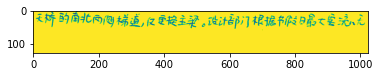

In [8]:
from data import preproc as pp
import matplotlib.pyplot as plt
%matplotlib inline
# from google.colab.patches import cv2_imshow

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, dtgen.dataset['test']['gt']):
        lg.write(f"TE_L {gt}\nTE_P {pd}\n")
   
for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
    print("=" * 1024, "\n")
    plt.imshow(pp.adjust_to_see(item))
    print(dtgen.dataset['test']['gt'][i])
    print(predicts[i], "\n")

## 7 Evaluate

Evaluation process is more manual process. Here we have the `ocr_metrics`, but feel free to implement other metrics instead. In the function, we have three parameters: 

* predicts
* ground_truth
* norm_accentuation (calculation with/without accentuation)
* norm_punctuation (calculation with/without punctuation marks)

In [9]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts=predicts,
                                  ground_truth=dtgen.dataset['test']['gt'],
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)

Total test images:    1
Total time:           0:00:03.072066
Time per item:        0:00:03.072066

Metrics:
Character Error Rate: 1.00000000
Word Error Rate:      1.00000000
Sequence Error Rate:  1.00000000
